<a href="https://colab.research.google.com/github/Mdipietro1990/masters-program/blob/master/Homework_LeNet_and_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading in the data from my google drive
from google.colab import drive
drive.mount('/content/drive')

# I created the validation dataset using ~10% of the train data.
# Unzipping the train, test and validation datasets. 
!unzip -q '/content/drive/My Drive/Colab Notebooks/train.zip'
!unzip -q '/content/drive/My Drive/Colab Notebooks/test1.zip'
!unzip -q '/content/drive/My Drive/Colab Notebooks/validation.zip'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# from __future__ import absolute_import, division, print_function, unicode_literals

# # Import TensorFlow
# import tensorflow as tf

# # Helper libraries
# import numpy as np
# import os

# assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

# assert float('.'.join(tf.__version__.split('.')[:2])) >= 1.14, 'Make sure that Tensorflow version is at least 1.14'

# TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']

# resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER)
# tf.contrib.distribute.initialize_tpu_system(resolver)
# strategy = tf.contrib.distribute.TPUStrategy(resolver)

In [3]:
# Imports used for the two models for VGG16 and for LeNet

import numpy as np
import pandas as pd

import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
# setting up the train and test data using the Keras ImageDataGenerator() API
# Which generates batches of tensor image data with real time data augmentation
# For LeNet it requires a size of 32 x 32
# The batch size default value is 32. 

train_data = '/content/train'
test_data = '/content/validation'

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_data,target_size=(32, 32), batch_size=32)

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_data, target_size=(32, 32))

Found 25000 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [0]:
# LeNet model creation using a sequental model structure. Convolutional layers, pooling layers
# and Dense fully connected layers.
# I also had to modify the input shape and change it from 32x32x1 to 32x32x3 the 
# 3 is used for 3 channels needed for RGB data

def build_model():
        model = keras.Sequential()

        model.add(layers.Conv2D(filters=6, 
                                kernel_size=(3, 3), 
                                activation='relu', 
                                input_shape=(32,32,3)))
        model.add(layers.AveragePooling2D())

        model.add(layers.Conv2D(filters=16, 
                                kernel_size=(3, 3), 
                                activation='relu'))
        
        model.add(layers.AveragePooling2D())

        model.add(layers.Flatten())

        model.add(layers.Dense(units=120, 
                               activation='relu'))

        model.add(layers.Dense(units=84, 
                               activation='relu'))

        model.add(layers.Dense(units=2, 
                               activation = 'softmax'))
        return model

In [6]:
# Building the model
model = build_model()
# Returning the model characteristics of the LeNet 
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_2 (Dense)              (None, 84)           

In [7]:
# The optimization used is Adam with a learning rate of 0.001 
opt = Adam(lr=0.001)
# Compiling the model to run 
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
# Executing the model with the given epochs with the training data and validation data. 
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





100/100 [==============================] - 14s 141ms/step - loss: 2.8219 - acc: 0.5150 - val_loss: 0.6840 - val_acc: 0.5938
Epoch 2/100
100/100 [==============================] - 7s 75ms/step - loss: 0.6825 - acc: 0.5850 - val_loss: 0.6584 - val_acc: 0.6000
Epoch 3/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6520 - acc: 0.6191 - val_loss: 0.6036 - val_acc: 0.6531
Epoch 4/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6504 - acc: 0.6234 - val_loss: 0.6214 - val_acc: 0.6594
Epoch 5/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6365 - acc: 0.6472 - val_loss: 0.6070 - val_acc: 0.6719
Epoch 6/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6347 - acc: 0.6403 - val_loss: 0.5982 - val_acc: 0.6937
Epoch 7/100
100/100 [==============================] - 7s 74ms/step - loss: 0.6311 - acc: 0.

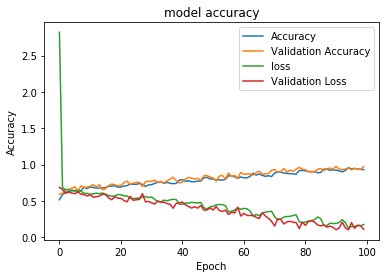

In [9]:
# Plotting the model metrics of accuracy, validation accuracy, loss and validation loss,
# looking at Accuracy on the y axis over the epoch on the axis.

plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


# Below is the model for the VGG16 



Setting up the VGG16 convolutional network

In [10]:
# setting up the train and test data using the Keras ImageDataGenerator() API
# Which generates batches of tensor image data with real time data augmentation
# For VGG16 convolutional network it requires a size of 224 x 224
# The batch size default value is 32. 

train_data = '/content/train'
test_data = '/content/validation'
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_data,target_size=(224,224), batch_size=32)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_data, target_size=(224,224))

Found 25000 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [11]:
# creating the model and the different layers needed for the VGG16 convolutional network using the sequential model structure
# I am using the relu for the activation function. 
# I am using multiple convolutional layers, maxpooling and a few dense fully connected layers.
# the pool size is 2,2 matrix and a kernal size matrix of 3x3, with the edge padding set as "same"

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(units=4096,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=4096,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=2, activation="softmax"))

In [0]:
# # Combining and creating the model
# # using 4096 nodes in each dense fully connected layer 
# # with an output layer output of 2 using softmax to give a percentage between 0 and 1
# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))

In [0]:
# Building the model using the Adam optimizor, and a loss funtion of categorical cross entropy
opt = Adam(lr=0.002)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
# Info about the created model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 256)      

In [15]:
# setting up the checkpoints since this model takes a very long time to train.
# the steps per epoch is the same as the length of the number of batches of 32 images 
# Set the epoch count to 10 to insure training before the collab session times out

checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

hist = model.fit_generator(steps_per_epoch=100,
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=10,
                           epochs=10)
'''
hist = model.fit_generator(steps_per_epoch=len(traindata),
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=10,
                           epochs=100)
'''

Epoch 1/10
100/100 [==============================] - 35s 353ms/step - loss: 4.2648 - acc: 0.5062 - val_loss: 2.3916 - val_acc: 0.5125
Epoch 2/10
100/100 [==============================] - 28s 278ms/step - loss: 1.1266 - acc: 0.5369 - val_loss: 0.6899 - val_acc: 0.6062
Epoch 3/10
100/100 [==============================] - 28s 278ms/step - loss: 0.9690 - acc: 0.5369 - val_loss: 1.6505 - val_acc: 0.5125
Epoch 4/10
100/100 [==============================] - 28s 278ms/step - loss: 0.9935 - acc: 0.5350 - val_loss: 0.9228 - val_acc: 0.5531
Epoch 5/10
100/100 [==============================] - 28s 277ms/step - loss: 0.9189 - acc: 0.5272 - val_loss: 3.0767 - val_acc: 0.5250
Epoch 6/10
100/100 [==============================] - 28s 279ms/step - loss: 0.9708 - acc: 0.5438 - val_loss: 0.9626 - val_acc: 0.5437
Epoch 7/10
100/100 [==============================] - 29s 287ms/step - loss: 0.9635 - acc: 0.5310 - val_loss: 0.8366 - val_acc: 0.5464
Epoch 8/10
100/100 [==============================] - 2

'\nhist = model.fit_generator(steps_per_epoch=len(traindata),\n                           generator=traindata, \n                           validation_data= testdata, \n                           validation_steps=10,\n                           epochs=100)\n'

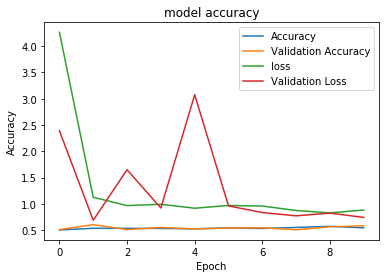

In [16]:
# Plotting the model metrics of accuracy, validation accuracy, loss and validation loss,
# looking at Accuracy on the y axis over the epoch on the axis.

plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

dog


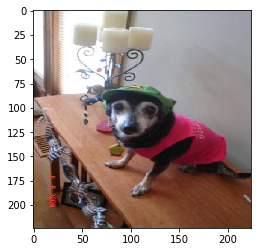

In [19]:
# Testing the model and seeing how it does at prediction of a given image of a 
# dog or cat.
from keras.preprocessing import image
img = image.load_img("/content/test1/105.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

In [18]:
|

SyntaxError: ignored